In [1]:
from torchvision import models
fcn = models.segmentation.fcn_resnet101(pretrained=True).eval()


Downloading: "https://download.pytorch.org/models/resnet101-5d3b4d8f.pth" to /root/.cache/torch/hub/checkpoints/resnet101-5d3b4d8f.pth


Downloading: "https://download.pytorch.org/models/fcn_resnet101_coco-7ecb50ca.pth" to /root/.cache/torch/hub/checkpoints/fcn_resnet101_coco-7ecb50ca.pth


2020-11-28 11:31:22 URL:https://static.independent.co.uk/s3fs-public/thumbnails/image/2018/04/10/19/pinyon-jay-bird.jpg [182965/182965] -> "bird.png" [1]


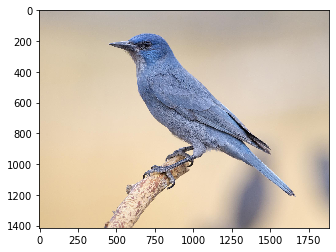

In [2]:
from PIL import Image
import matplotlib.pyplot as plt
import torch

 
!wget -nv https://static.independent.co.uk/s3fs-public/thumbnails/image/2018/04/10/19/pinyon-jay-bird.jpg -O bird.png
img = Image.open('./bird.png')
plt.imshow(img)
plt.show()

In [3]:
# Apply the transformations needed
import torchvision.transforms as T

# PREPROCESSING LAYER
trf = T.Compose([T.Resize(256),
                 T.CenterCrop(224),
                 T.ToTensor(),
                 T.Normalize(mean = [0.485, 0.456, 0.406],
                             std = [0.229, 0.224, 0.225])])

# PREPROCESSING IMAGE
inp = trf(img).unsqueeze(0)

print(inp)

tensor([[[[1.1529, 1.1529, 1.1700,  ..., 1.0159, 0.9988, 0.9988],
          [1.1700, 1.1700, 1.1872,  ..., 0.9988, 0.9988, 1.0159],
          [1.1872, 1.1872, 1.2043,  ..., 0.9988, 0.9988, 1.0159],
          ...,
          [1.8893, 1.8893, 1.8893,  ..., 1.7180, 1.7523, 1.8037],
          [1.8893, 1.8893, 1.8893,  ..., 1.7352, 1.7694, 1.8037],
          [1.8893, 1.8722, 1.8722,  ..., 1.7523, 1.7865, 1.8037]],

         [[1.1331, 1.1331, 1.1506,  ..., 0.9930, 0.9755, 0.9755],
          [1.1331, 1.1331, 1.1506,  ..., 0.9755, 0.9755, 0.9930],
          [1.1331, 1.1331, 1.1506,  ..., 0.9755, 0.9755, 0.9930],
          ...,
          [1.5532, 1.5532, 1.5532,  ..., 1.4832, 1.5182, 1.5532],
          [1.5707, 1.5707, 1.5707,  ..., 1.4832, 1.5357, 1.5707],
          [1.5707, 1.5532, 1.5532,  ..., 1.5007, 1.5532, 1.5707]],

         [[1.1411, 1.1411, 1.1585,  ..., 1.0365, 1.0191, 1.0191],
          [1.0888, 1.1062, 1.1411,  ..., 1.0191, 1.0191, 1.0365],
          [1.0714, 1.0888, 1.1237,  ..., 1

In [4]:
# Pass the input through the net
out = fcn(inp)['out']


In [5]:
import numpy as np
om = torch.argmax(out.squeeze(), dim=0).detach().cpu().numpy()
print (om.shape)
print (np.unique(om))

(224, 224)
[0 3]


In [6]:
# Define the helper function
def decode_segmap(image, nc=21):
    label_colors = np.array([(0, 0, 0),  # 0=background
               # 1=aeroplane, 2=bicycle, 3=bird, 4=boat, 5=bottle
               (128, 0, 0), (0, 128, 0), (128, 128, 0), (0, 0, 128), (128, 0, 128),
               # 6=bus, 7=car, 8=cat, 9=chair, 10=cow
               (0, 128, 128), (128, 128, 128), (64, 0, 0), (192, 0, 0), (64, 128, 0),
               # 11=dining table, 12=dog, 13=horse, 14=motorbike, 15=person
               (192, 128, 0), (64, 0, 128), (192, 0, 128), (64, 128, 128), (192, 128, 128),
               # 16=potted plant, 17=sheep, 18=sofa, 19=train, 20=tv/monitor
               (0, 64, 0), (128, 64, 0), (0, 192, 0), (128, 192, 0), (0, 64, 128)])

    r = np.zeros_like(image).astype(np.uint8)
    g = np.zeros_like(image).astype(np.uint8)
    b = np.zeros_like(image).astype(np.uint8)

    for l in range(0, nc):
        idx = image == l
        r[idx] = label_colors[l, 0]
        g[idx] = label_colors[l, 1]
        b[idx] = label_colors[l, 2]

    rgb = np.stack([r, g, b], axis=2)
    return rgb

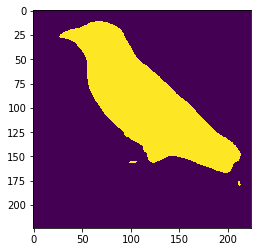

In [7]:
import cv2
rgb = decode_segmap(om)

# grayscale the image
grayed = cv2.cvtColor(rgb, cv2.COLOR_BGR2GRAY)

#thredshold image
thresh = cv2.threshold(grayed, 0, 255, cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)[1]

plt.imshow(grayed)
plt.show()


for x in grayed:
    lst = x.tolist()
    print(''.join([' ' if x==0 else 'x' for x in lst]))
